Tensorflow version 2.9.2
keras version 2.9.0
4422102/4422102 [==============================] - 0s 0us/step
Train data shape: (55000, 28, 28)
Validation data shape: (5000, 28, 28)
Test data shape: (10000, 28, 28)
Class label is: 4
Class name is: Coat


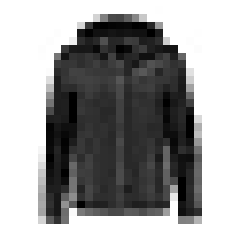

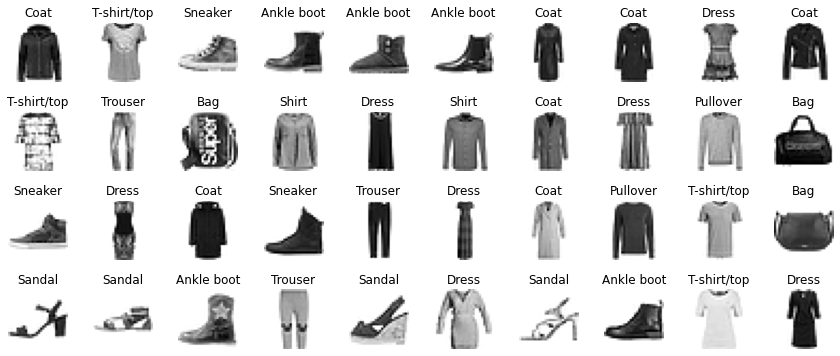

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1719/1719 [==============================] - 17s 9ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [===============

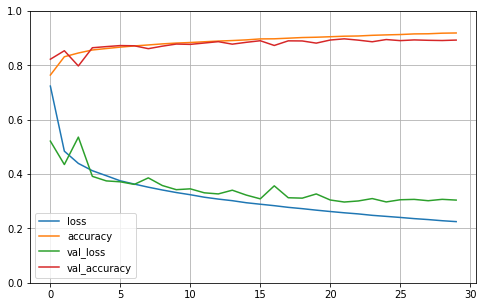

1/1 [==============================] - 0s 85ms/step
[9 2 1]
['Ankle boot', 'Pullover', 'Trouser']


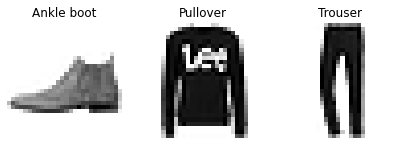

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
print("Tensorflow version", tf.__version__)
from tensorflow import keras
print("keras version", keras.__version__)
import matplotlib.pyplot as plt
np.random.seed(42) 
tf.random.set_seed(42)


fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape


X_valid = X_train_full[:5000]/255
y_valid = y_train_full[:5000]
X_train = X_train_full[5000:]/255
y_train = y_train_full[5000:]

print("Train data shape:",X_train.shape)
print("Validation data shape:",X_valid.shape)
print("Test data shape:",X_test.shape)

X_test = X_test / 255.


class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
       "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print("Class label is:", y_train[0])
print("Class name is:", class_names[y_train[0]])
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

n_rows = 4
n_cols = 10
plt.figure(figsize=(15, 6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index],cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.layers
model.summary()
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)
sgd = keras.optimizers.SGD(learning_rate=0.01)

model.compile(loss="sparse_categorical_crossentropy",
      optimizer=sgd,
      metrics=["accuracy"])


history = model.fit(X_train, y_train, epochs=30,
            validation_data=(X_valid, y_valid))

history.params
hidden1 = model.layers[1]
print(hidden1.name)
weights, biases = hidden1.get_weights() # getting the weights and biases
print(weights.shape, weights)
print(biases)
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # setting limits for y-axis
plt.show()

model.evaluate(X_test, y_test)
y_pred = np.argmax(model.predict(X_test[:3]), 1)
print(y_pred)
print([class_names[index] for index in y_pred])
plt.figure(figsize=(7, 3))

for index, image in enumerate(X_test[:3]):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary")
    plt.axis('off')
    plt.title(class_names[y_pred[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()